# Gravitational Waves

This notebook provides a function which input the masses and distances of the gw sources, and produce the signal to noise ratio. Referring to Jose's notebook waveform_playground

In [1]:
import numpy as np
import bilby
#PLOTS
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

We first define the parameters of the binary:

- First the masses
- Then 6 parameters for the spins. Note that they are not in carteseian coordiantes. See for example https://lscsoft.docs.ligo.org/lalsuite/lalsimulation/group__lalsimulation__inference.html (I'll check for a better reference)
- Luminosity distance
- Inclination
- Polarization angle
- Phase at reference frequency
- Time of coalescence
- Right ascension
- Declination

In [2]:
binary_parameters = dict(
        mass_1=35.,
        mass_2=30.,
        a_1= 0.,
        a_2= 0.,
        tilt_1= 0.,
        tilt_2= 0.,
        phi_12= 0.,
        phi_jl= 0.,
        luminosity_distance = 500.,
        theta_jn = np.pi/3.,
        psi = np.pi/8.,
        phase = 0.,
        geocent_time = 0.,
        ra = np.pi/4.,
        dec = 3.*np.pi/2,
    )

We then specify the properties of the waveform model, in particular we use a waveform family IMRPhenom that has the possibility of including higher modes (HM) and precession (P).

For the beginning we only include the quadrupole radiation $l,m=2,2$ setting the mode array to $[2,\pm2]$

_References:_ https://arxiv.org/pdf/2004.06503.pdf

In [3]:
waveform_arguments = dict(
        waveform_approximant = 'IMRPhenomXPHM',
        reference_frequency = 50.,
        minimum_frequency = 20.,
        maximum_frequency = 2000.,
        mode_array = [[2,2],[2,-2]],
    )

In [4]:
duration = 4.0
sampling_frequency = 2048.0

waveform_generator = bilby.gw.WaveformGenerator(
        duration = duration,
        sampling_frequency = sampling_frequency,
        frequency_domain_source_model = bilby.gw.source.lal_binary_black_hole,
        parameter_conversion = bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters,
        waveform_arguments = waveform_arguments,
    )

15:44 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


/Users/shangmiao/anaconda3/envs/gw_basic/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


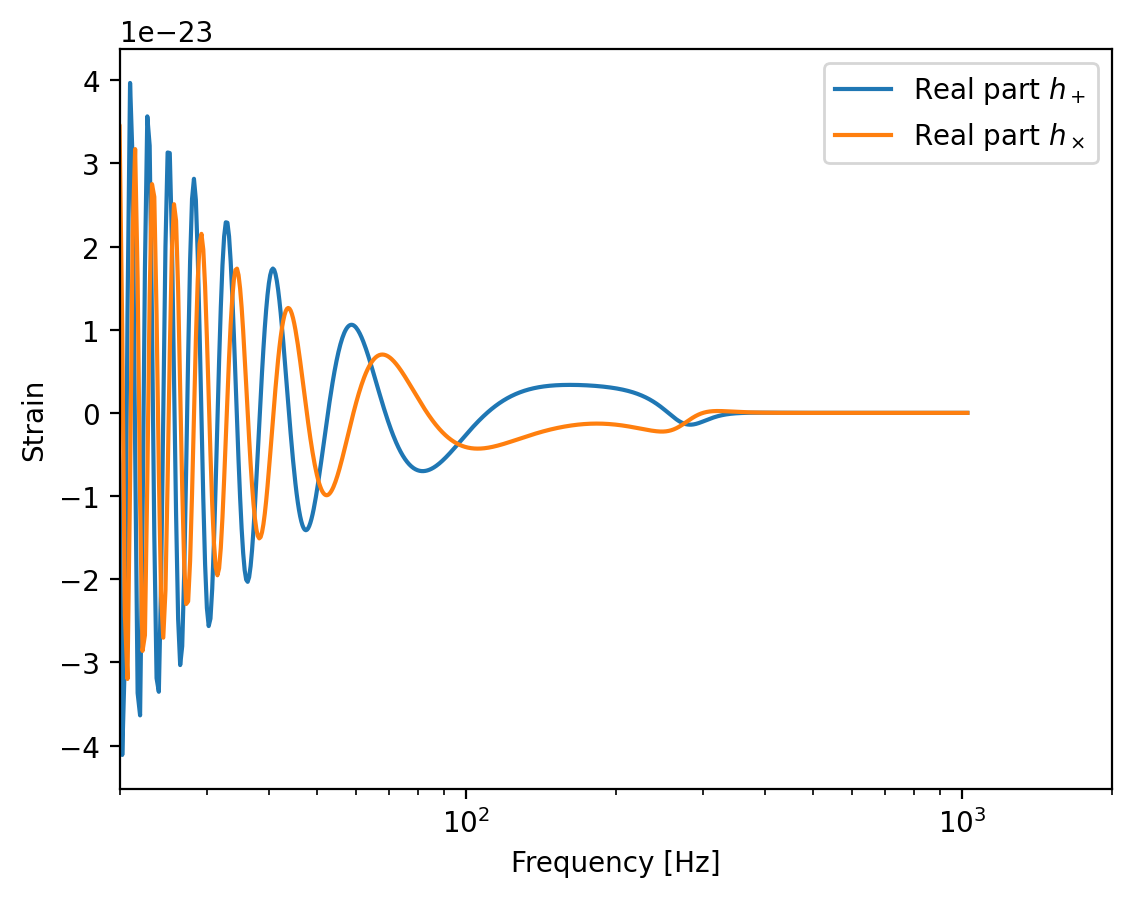

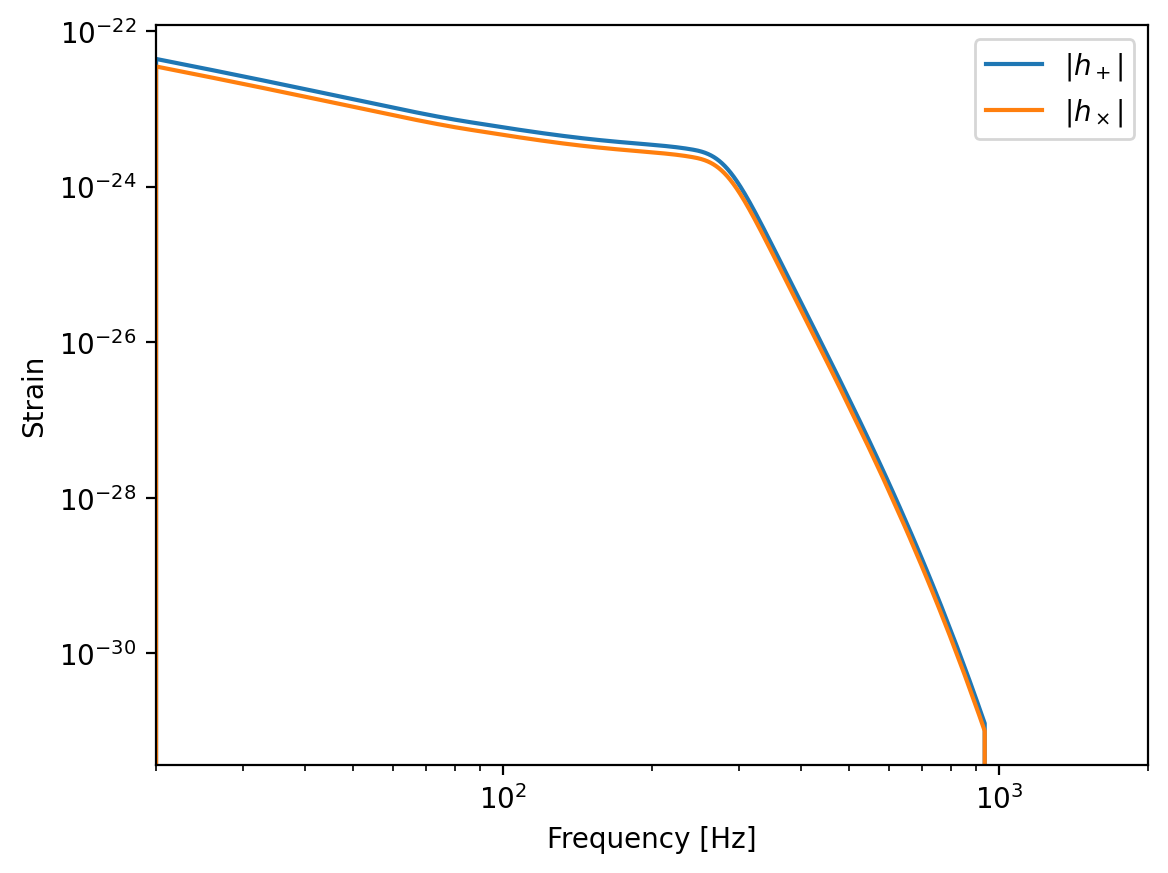

In [5]:
gen_h = waveform_generator.frequency_domain_strain(binary_parameters)
fs = bilby.core.utils.series.create_frequency_series(sampling_frequency,duration)

hp = gen_h['plus']
hx = gen_h['cross']

plt.semilogx(fs,hp,label=r'Real part $h_+$')
plt.plot(fs,hx,label=r'Real part $h_\times$')
plt.xlabel(r'Frequency [Hz]')
plt.ylabel(r'Strain')
plt.xlim([20,2e3])
plt.legend()
plt.show()

plt.loglog(fs,abs(hp),label=r'$|h_+|$')
plt.plot(fs,abs(hx),label=r'$|h_\times|$')
plt.xlabel(r'Frequency [Hz]')
plt.ylabel(r'Strain')
plt.xlim([20,2e3])
plt.legend()
plt.show()

We get the noise curves document from https://dcc.ligo.org/LIGO-T2000012-v1/public tables with frequency and Amplitude spectral density are provided and we can get power spectral density (PSD) which is the square of ASD

In [22]:
f=np.load('aligo_O4high.txt')

In [28]:
frequency,psd= f[:,0],np.square(f[:,1])

Text(0, 0.5, 'Power Spectral Density')

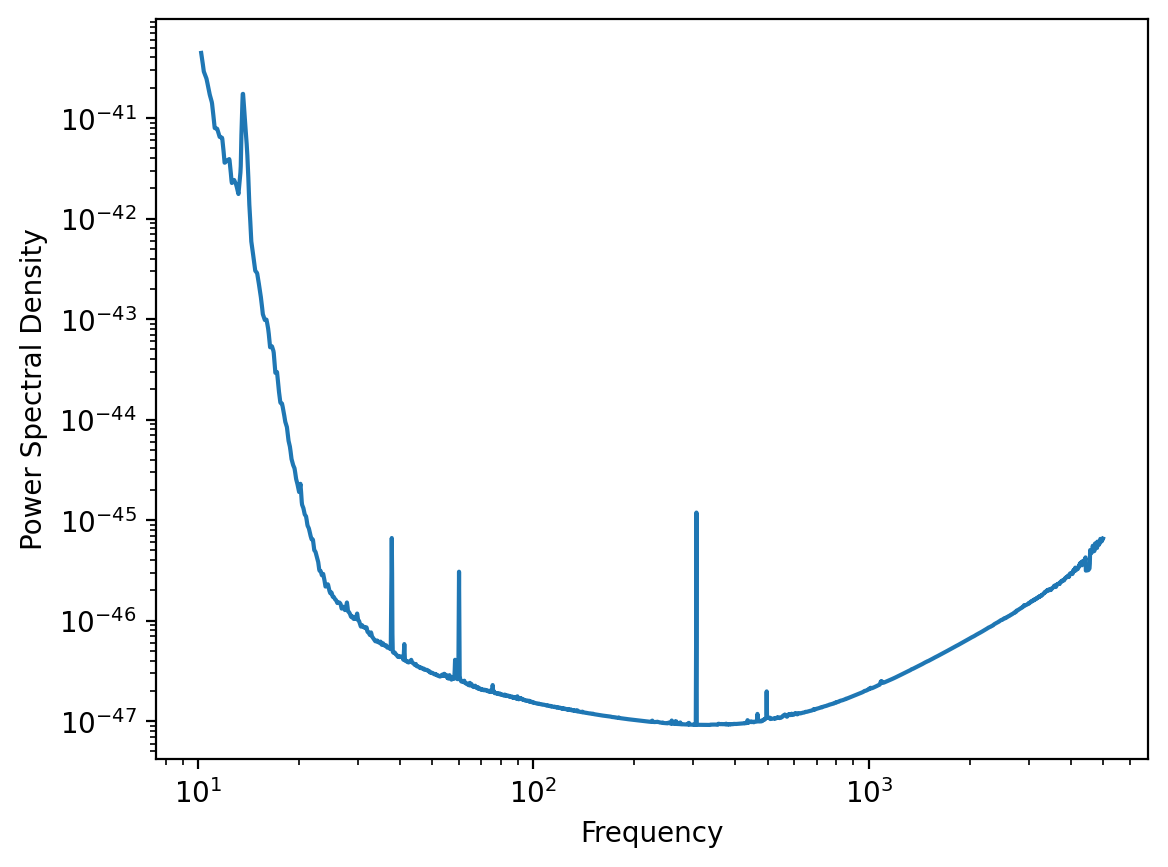

In [30]:
plt.loglog(frequency,psd)
plt.xlabel('Frequency')
plt.ylabel('Power Spectral Density')

The signal to noise ratio is defined by 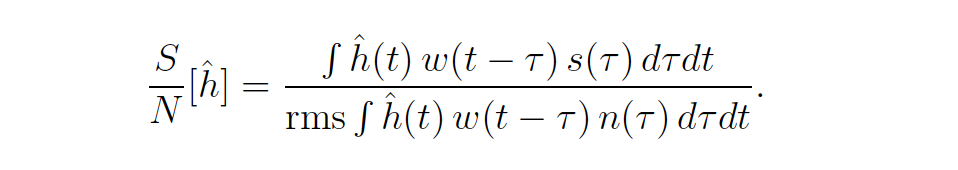 We can also use the square of singal to noise ratio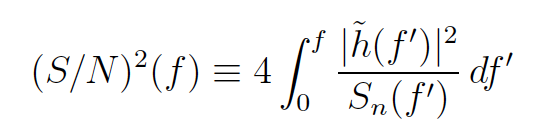

In [58]:
from scipy import integrate
from scipy import constants

In [59]:
s2n_square=4*integrate.trapz(abs(np.square(hp[:2000]))/psd[:2000])
s2n=s2n_square**(1/2)

In [60]:
s2n

36.093030131135514

## SNR function using self defined mass_1 and mass_2, and distance of the objects

In [71]:
def SNR(mass1,mass2,distance):
    #distance should have unit of Gpc
    binary_parameters = dict(
        mass_1=35.,
        mass_2=30.,
        a_1= 0.,
        a_2= 0.,
        tilt_1= 0.,
        tilt_2= 0.,
        phi_12= 0.,
        phi_jl= 0.,
        luminosity_distance = 500.,
        theta_jn = np.pi/3.,
        psi = np.pi/8.,
        phase = 0.,
        geocent_time = 0.,
        ra = np.pi/4.,
        dec = 3.*np.pi/2,
    )
    
    binary_parameters['mass_1']=mass1
    binary_parameters['mass_2']=mass2
    binary_parameters['luminosity_distance']=distance
    
    waveform_arguments = dict(
        waveform_approximant = 'IMRPhenomXPHM',
        reference_frequency = 50.,
        minimum_frequency = 20.,
        maximum_frequency = 2000.,
        mode_array = [[2,2],[2,-2]],
    )
    duration = 4.0
    sampling_frequency = 2048.0

    waveform_generator = bilby.gw.WaveformGenerator(
        duration = duration,
        sampling_frequency = sampling_frequency,
        frequency_domain_source_model = bilby.gw.source.lal_binary_black_hole,
        parameter_conversion = bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters,
        waveform_arguments = waveform_arguments,
    )
    gen_h = waveform_generator.frequency_domain_strain(binary_parameters)
    fs = bilby.core.utils.series.create_frequency_series(sampling_frequency,duration)

    hp = gen_h['plus']
    hx = gen_h['cross']
    
    s2n_square=4*integrate.trapz(abs(np.square(hp[:2000]))/psd[:2000])
    s2n=s2n_square**(1/2)
    
    print(s2n)

In [72]:
SNR(30.,35.,500.)

20:21 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


36.093030131135514
